코드가 돌아갈 Background 설정 및 Conda 환경 실행

In [1]:
%cd C:/Users/Test/Project/
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from collections import Counter

C:\Users\Test\Project


In [2]:
chunk_size = 10000

chunk_reader = pd.read_csv('filter130pileup.csv', chunksize=chunk_size)
filter130pileup = pd.concat(chunk_reader)

In [4]:
len(filter130pileup['pos']), len(filter130pileup['count'])

(47076399, 47076399)

그래프를 그려서 확인

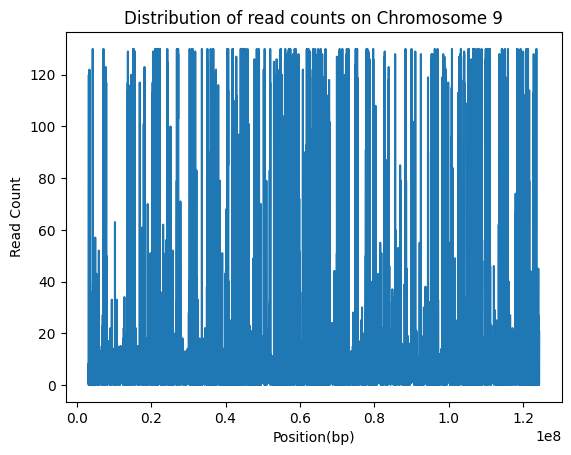

In [8]:
x=filter130pileup['pos']
y=filter130pileup['count']
plt.plot(x,y)
plt.xlabel('Position(bp)')
plt.ylabel('Read Count')
plt.title('Distribution of read counts on Chromosome 9')
plt.show()


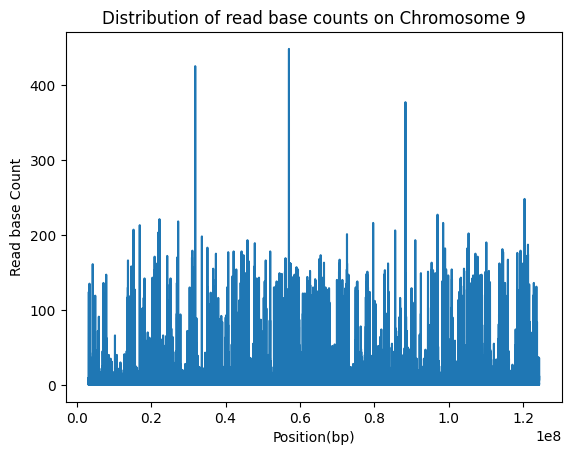

In [11]:
x=filter130pileup['pos']
y=filter130pileup['base_count']
plt.plot(x,y)
plt.xlabel('Position(bp)')
plt.ylabel('Read base Count')
plt.title('Distribution of read base counts on Chromosome 9')
plt.show()

Shannon entropy:  

H = −∑ p(i)*log2p(i)  

shannon = -np.sum(non_zero_frequencies * np.log(non_zero_frequencies))  

In [9]:
filter130pileup.head(n=1)

,Unnamed: 0,chrom,pos,_ref,count,basereads,quals,matches,base_count
0,0,chr9,3090493,N,4,^HA^IA^GA^HA,HIEG,HAIAGAHA,5


non-zero frequency 정의가 무엇인지 확실히 해야함  

Shannon entropy 구하는 여러 방법 존재  

from scipy.stats import entropy
shannon_entropy = entropy(data, base=2)

import numpy as np
shannon_entropy = np.entropy(data, base=2)

지금 이 이후로는 정의가 잘못되어서 수정 필요

In [16]:
total = np.sum(filter130pileup['base_count'])
prob = filter130pileup['base_count']/total
nonzero = prob[prob!=0]

In [17]:
filter130pileup['nonzero'] = prob[prob!=0]
filter130pileup['nonzero'].fillna(0, inplace=True)
filter130pileup.head()

,Unnamed: 0,chrom,pos,_ref,count,basereads,quals,matches,base_count,nonzero
0,0,chr9,3090493,N,4,^HA^IA^GA^HA,HIEG,HAIAGAHA,5,2.544000e-07
1,1,chr9,3090494,N,4,GGGG,HIGG,GGGG,4,2.035200e-07
2,2,chr9,3090495,N,4,GGGG,HIGG,GGGG,4,2.035200e-07
3,3,chr9,3090496,N,4,GGGG,GHEG,GGGG,4,2.035200e-07
4,4,chr9,3090497,N,4,GGGG,HIGG,GGGG,4,2.035200e-07


In [19]:
filter130pileup['shannon'] = -filter130pileup['nonzero']*np.log2(filter130pileup['nonzero'])
filter130pileup['shannon'].fillna(0, inplace=True)
filter130pileup.head()

c:\Users\HYEONJ~1\AppData\Local\R-MINI~1\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Unnamed: 0,chrom,pos,_ref,count,basereads,quals,matches,base_count,nonzero,shannon
0,0,chr9,3090493,N,4,^HA^IA^GA^HA,HIEG,HAIAGAHA,5,2.544000e-07,0.000006
1,1,chr9,3090494,N,4,GGGG,HIGG,GGGG,4,2.035200e-07,0.000005
2,2,chr9,3090495,N,4,GGGG,HIGG,GGGG,4,2.035200e-07,0.000005
3,3,chr9,3090496,N,4,GGGG,GHEG,GGGG,4,2.035200e-07,0.000005
4,4,chr9,3090497,N,4,GGGG,HIGG,GGGG,4,2.035200e-07,0.000005


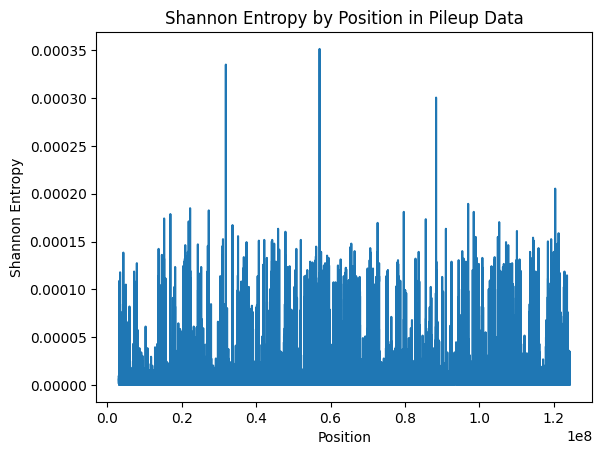

In [22]:
plt.plot(filter130pileup['pos'], filter130pileup['shannon'])
plt.xlabel('Position')
plt.ylabel('Shannon Entropy')
plt.title('Shannon Entropy by Position in Pileup Data')
plt.show()